Look at VG, etc., over time under the Tennessen et al. demographic model for Europeans.

In [1]:
%matplotlib inline
import pandas as pd
from tennessen import get_nlist
import matplotlib
import matplotlib.pyplot as plt

/data/apps/user_contributed_software/krthornt/python/2.7.10/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
N=get_nlist()

In [3]:
len(N)

79020

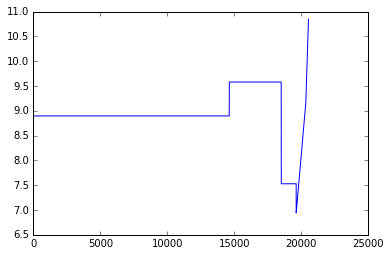

In [4]:
import numpy as np
plt.plot(np.log(N[8*N[0]+1:]))

In [5]:
import glob

In [6]:
gbr=glob.glob('gbr.*.stats.h5')

0
0.1
0.25
1


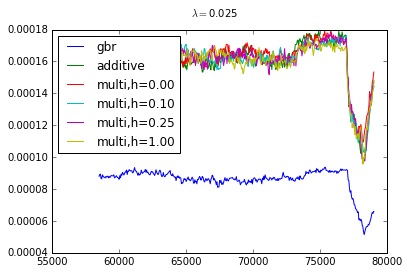

0
0.1
0.25
1


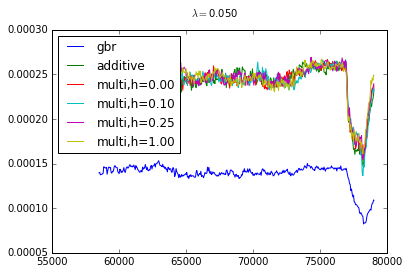

0
0.1
0.25
1


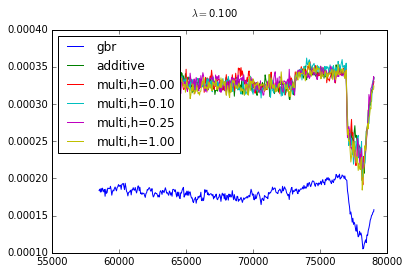

0
0.1
0.25
1


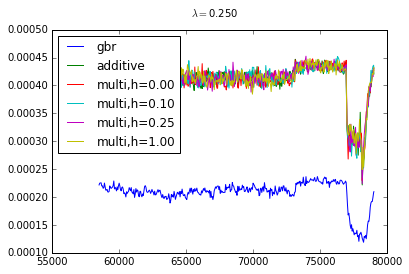

0
0.1
0.25
1


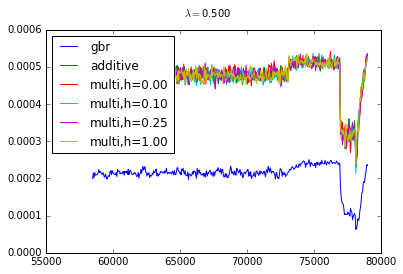

In [16]:
L=[0.025, 0.05, 0.1, 0.25, 0.5]
H=[0,0.1,0.25,1]
g=range(len(N[(N[0]*8)+1:]))
for l in L:
    fig=plt.figure()
    files=glob.glob('gbr.lambda'+str(l)+'*stats*.h5')
    for f in files:
        x=pd.read_hdf(f)
        xg=x.groupby(['stat','generation']).median()
        xg.reset_index(inplace=True)
        xgt=xg[xg.generation > 8*N[0]]
        plt.plot(xgt.generation[xgt.stat=='VG'],xgt.value[xgt.stat=='VG'],label='gbr')
    files=glob.glob('additive.lambda'+str(l)+'*stats*.h5')
    for f in files:
        x=pd.read_hdf(f)
        xg=x.groupby(['stat','generation']).median()
        xg.reset_index(inplace=True)
        xgt=xg[xg.generation > 8*N[0]]
        plt.plot(xgt.generation[xgt.stat=='VG'],xgt.value[xgt.stat=='VG'],label='additive')
    for h in H:
        print h
        f='multi.lambda'+str(l)+'.stats.h'+str(h)+'.h5'
        x=pd.read_hdf(f)
        xg=x.groupby(['stat','generation']).median()
        xg.reset_index(inplace=True)
        xgt=xg[xg.generation > 8*N[0]]
        plt.plot(xgt.generation[xgt.stat=='VG'],xgt.value[xgt.stat=='VG'],label=r'multi,h='+'{0:.2f}'.format(h))
    plt.legend(loc='upper left')
    plt.suptitle(r'$\lambda =$'+'{0:0.3f}'.format(l))
    plt.show()